In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
from os import walk
import numpy as np
experiment_result_folder = '/Users/sanjanatule/Documents/uq/Projects/indelmip/evaluation/synthetic/'
data_folder = '/Users/sanjanatule/Documents/uq/Projects/indelmip/data/travis/'
plot_output_folder = '/Users/sanjanatule/Documents/uq/Projects/indelmip/plots_for_paper/'

In [2]:
plt.rc('axes',  titlesize=15)     # fontsize of the axes title
plt.rc('axes',  labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('legend',fontsize=10)    # legend fontsize
plt.rc('font',  size=12)          # controls default text sizes
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Serif"
colors = sns.color_palette('deep')
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(15,9)})
sns.set_style("ticks")

# 1 - DIFFERENCE IN INDEL EVENTS

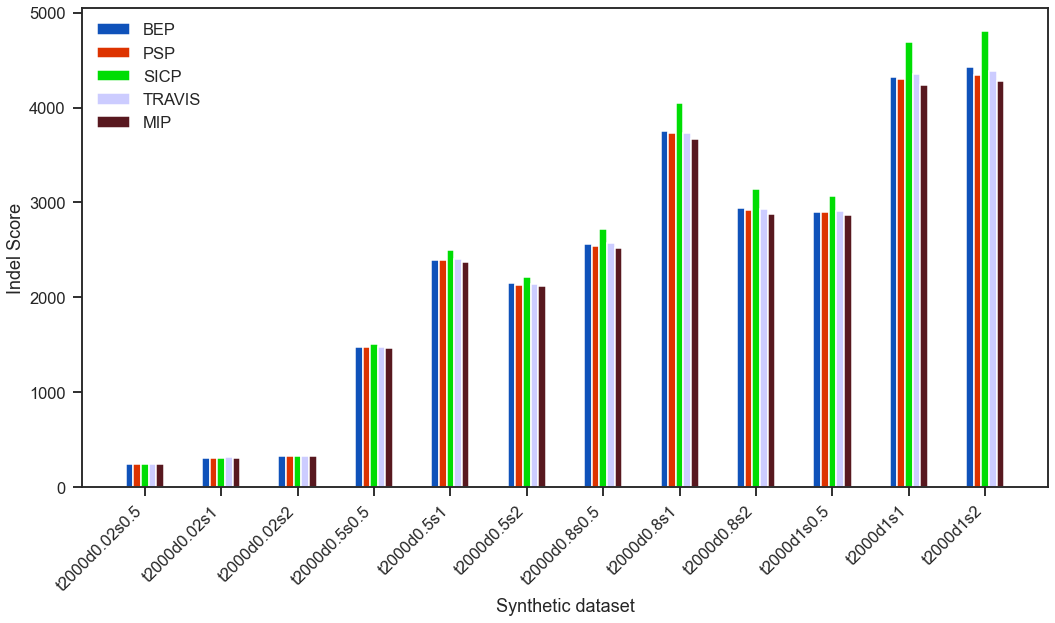

In [6]:
# read all score files for all protein families in the folder
sns.set_context('talk')
with open(experiment_result_folder + 'gt_comparison_plot.csv', 'w') as outfile:
    outfile.write('protein_family,method,score\n')
    for (sub_folder, _, _) in walk(data_folder):
        if '2000d' in sub_folder :
            os.chdir(sub_folder)
            for fname in glob.glob("*indscore*"):
                with open(fname) as infile:
                    for line in infile:
                        pr = sub_folder.split('/')[-1]
                        outfile.write(pr + ',' + line + '\n' )
            
score_data = pd.read_csv(experiment_result_folder + 'gt_comparison_plot.csv')
# score_data['protein_family'] = pd.Categorical(score_data['protein_family'],cat_order)
# display(score_data)
score_data = score_data.sort_values(['protein_family',"method"])
score_data = score_data.pivot(index='protein_family', columns='method', values='score').reset_index()
 
labels = score_data['protein_family']
x = np.arange(len(labels)) 
width = 0.2
fig,ax1 = plt.subplots(tight_layout=True)
rects1 = ax1.bar(x - width/2 - width/2, score_data['bep'], width/2, label='BEP',color='#0F52BA')
rects2 = ax1.bar(x - width/2, score_data['psp'], width/2, label='PSP',color='#DD3300')
rects3 = ax1.bar(x, score_data['sicp'], width/2, label='SICP',color='#00DD03')
rects4 = ax1.bar(x + width/2, score_data['tr'], width/2, label='TRAVIS',color='#CCCCFF')
rects5 = ax1.bar(x + width/2 + width/2, score_data['mip'], width/2, label='MIP',color='#58181F')
ymin, ymax = plt.ylim()


ax1.set_ylabel('Indel Score')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
plt.xticks(rotation=45,ha="right")
ax1.set_xlabel('Synthetic dataset')
ax1.legend(loc="upper left")
bbox = ax1.get_tightbbox(fig.canvas.get_renderer())
fig.savefig(filename,dpi=1000)
filename = plot_output_folder + "gt_comparison_plot.jpg"
#fig.tight_layout()
plt.show()